# Configure and manage data

In [488]:
import pandas as pd
import pandasql as ps
from zerobouncesdk import ZeroBounce, ZBException, ZBValidateBatchElement

## Task 1: Configure and manage data

### Open Files

In [489]:
c1_file_id = "1S30DiJde31PHGN50cKdf0L0PZnSgWYQ3"
c2_file_id = "1VwHQ99q8MMBRAr8Gnz7d61ZmbxGj9xA2"
cd_file_id = "1yAY37jX2wMjl1OVjudwXG8TrSFjJPdXx"

c1_url = f"https://drive.google.com/uc?id={c1_file_id}"
c2_url = f"https://drive.google.com/uc?id={c2_file_id}"
cd_url = f"https://drive.google.com/uc?id={cd_file_id}"

contact1 = pd.read_csv(c1_url)
contact2 = pd.read_csv(c2_url)
continent_data = pd.read_csv(cd_url)

### Clean contact1

In [490]:
contact1.head()

,id,first_name,last_name,email,city,Title,Department,Years of Experience
0,1,Jemimah,Tirte,jtirte0@reference.com,Moscow,CEO,Executive,0.0
1,2,Livy,Leavey,lleavey1@tmall.com,Shofirkon,CTO,Engineering,18.0
2,3,Robinet,Orviss,rorviss2@ed.gov,Barabedang,COO,Operations,17.0
3,4,Jodie,Callister,jcallister3@youtu.be,Guangning,CFO,Finance,18.0
4,5,Symon,Figure,sfigure4@chicagotribune.com,Xunzhong,VP of Engineering,Engineering,15.0


In [491]:
contact1['first_name'] = contact1['first_name'].str.title()
contact1['last_name'] = contact1['last_name'].str.title()
contact1['email'] = contact1['email'].str.lower()
contact1['city'] = contact1['city'].str.title()
contact1['Department'] = contact1['Department'].str.title()
contact1['Years of Experience'] = contact1['Years of Experience'].fillna(0).astype(int)
contact1

,id,first_name,last_name,email,city,Title,Department,Years of Experience
0,1,Jemimah,Tirte,jtirte0@reference.com,Moscow,CEO,Executive,0
1,2,Livy,Leavey,lleavey1@tmall.com,Shofirkon,CTO,Engineering,18
2,3,Robinet,Orviss,rorviss2@ed.gov,Barabedang,COO,Operations,17
3,4,Jodie,Callister,jcallister3@youtu.be,Guangning,CFO,Finance,18
4,5,Symon,Figure,sfigure4@chicagotribune.com,Xunzhong,VP of Engineering,Engineering,15
5,6,Che,Winton,cwinton5@furl.net,Ashtarak,VP of Marketing,Marketing,14
6,7,Blinni,Doniso,bdoniso6@theglobeandmail.com,Fangcun,VP of Sales,Sales,14
7,8,Odo,Yerrill,oyerrill7@cisco.com,Pasararba,NaN,Product,13
8,9,Thekla,Dummett,tdummett8@163.com,Oslo,NaN,Operations,13
9,10,Jone,Sleite,jsleite9@yandex.ru,NaN,NaN,Human Resources,12


### Clean contact2

In [492]:
contact2.head()

,first_name,last_name,email,city,country
0,Jemimah,Tirte,jtirte0@reference.com,NaN,Russia
1,LIVY,Leavey,LLeaVey1@Tmall.com,Shofirkon,Uzbekistan
2,ROBINET,Orviss,RoRvisS2@Ed.gov,Barabedang,Indonesia
3,JODIE,Callister,JCalliSter3@YouTu.be,Guangning,China
4,JODIE,Callister,JCalliSter3@YouTu.be,Guangning,China


In [493]:
contact2['first_name'] = contact2['first_name'].str.title()
contact2['last_name'] = contact2['last_name'].str.title()
contact2['email'] = contact2['email'].str.lower()
contact2['city'] = contact2['city'].str.title()
contact2['country'] = contact2['country'].str.title()
contact2.drop_duplicates(inplace=True)
contact2

,first_name,last_name,email,city,country
0,Jemimah,Tirte,jtirte0@reference.com,NaN,Russia
1,Livy,Leavey,lleavey1@tmall.com,Shofirkon,Uzbekistan
2,Robinet,Orviss,rorviss2@ed.gov,Barabedang,Indonesia
3,Jodie,Callister,jcallister3@youtu.be,Guangning,China
6,Symon,Figure,sfigure4@chicagotribune.com,Xunzhong,China
7,Che,Winton,cwinton5@furl.net,Ashtarak,Armenia
8,Blinni,Doniso,bdoniso6@theglobeandmail.com,Fangcun,China
9,Odo,Yerrill,oyerrill7@cisco.com,Pasararba,Indonesia
10,Thekla,Dummett,tdummett8@163.com,Oslo,Norway
11,Jone,Sleite,jsleite9@yandex.ru,NaN,Azerbaijan


### Merge contact1 and contact2

In [494]:
unified_contacts = contact1.merge(contact2, how='left', on='email', suffixes=('', '_c2'))

duplicated_cols = [col[:-3] for col in unified_contacts.columns if col.endswith('_c2')]
for col in duplicated_cols:
    unified_contacts[col] = unified_contacts[col].combine_first(unified_contacts[f'{col}_c2'])
unified_contacts.drop(columns=[col for col in unified_contacts.columns if col.endswith('_c2')], inplace=True)
unified_contacts.set_index('id', inplace=True)
unified_contacts

,first_name,last_name,email,city,Title,Department,Years of Experience,country
id,,,,,,,,
1,Jemimah,Tirte,jtirte0@reference.com,Moscow,CEO,Executive,0,Russia
2,Livy,Leavey,lleavey1@tmall.com,Shofirkon,CTO,Engineering,18,Uzbekistan
3,Robinet,Orviss,rorviss2@ed.gov,Barabedang,COO,Operations,17,Indonesia
4,Jodie,Callister,jcallister3@youtu.be,Guangning,CFO,Finance,18,China
5,Symon,Figure,sfigure4@chicagotribune.com,Xunzhong,VP of Engineering,Engineering,15,China
6,Che,Winton,cwinton5@furl.net,Ashtarak,VP of Marketing,Marketing,14,Armenia
7,Blinni,Doniso,bdoniso6@theglobeandmail.com,Fangcun,VP of Sales,Sales,14,China
8,Odo,Yerrill,oyerrill7@cisco.com,Pasararba,NaN,Product,13,Indonesia
9,Thekla,Dummett,tdummett8@163.com,Oslo,NaN,Operations,13,Norway


## Task 2: Create a SQL View (dataset)

In [495]:
continent_data['Country'] = continent_data['Country'].str.title()
continent_data['Continent'] = continent_data['Continent'].str.title()
continent_data.head()

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [496]:
query = '''
SELECT
  continent,
  COUNT(*) AS contact_count 
FROM  unified_contacts
JOIN  continent_data  
  ON  unified_contacts.country = continent_data.country
GROUP BY continent
ORDER BY contact_count DESC;
'''

result = ps.sqldf(query, locals())
result

,Continent,contact_count
0,Asia,16
1,Europe,8
2,South America,2
3,Africa,2
4,North America,1


## Task 2.1 (optional): Visualize results in Insights

<Axes: xlabel='Continent'>

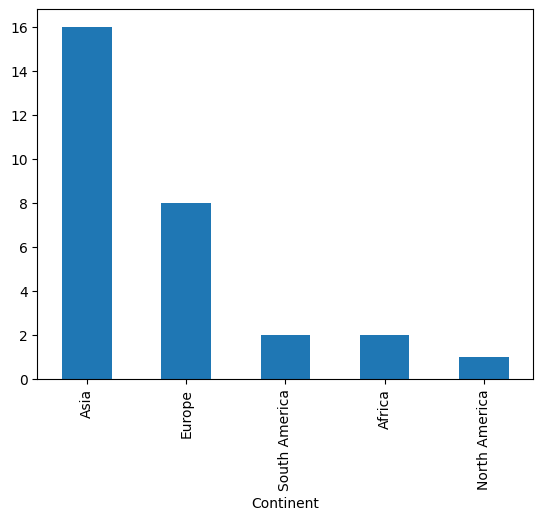

In [497]:
result.plot(kind='bar', x='Continent', y='contact_count', legend=False)

## Task 3: Validate email addresses via API

In [498]:
token = '<token_here>'
zero_bounce = ZeroBounce(token)

email_batch = [ ZBValidateBatchElement(email) for email in unified_contacts['email'].tolist()]

try:
    response = zero_bounce.validate_batch(email_batch)
    if getattr(response, "errors", None):
        print("Errors found:")
        for e in response.errors:
            print(f"  Error: {getattr(e, 'error', 'Unknown error')}")
    else:
        print("No errors in response.")
    
    results = {}
    for r in response.email_batch:
        results[r.address] = r.status

    for e in getattr(response, 'errors', []):
        results[e.email_address] = ''

    unified_contacts['email_valid'] = unified_contacts['email'].map(results)
    unified_contacts['email_valid'] = unified_contacts['email_valid'].fillna('')

except ZBException as e:
    print('ZeroBounce validate_batch error:', str(e))
    unified_contacts['email_valid'] = ''

ZeroBounce validate_batch error: Request not processed succesfully. Status code 403


In [499]:
unified_contacts

,first_name,last_name,email,city,Title,Department,Years of Experience,country,email_valid
id,,,,,,,,,
1,Jemimah,Tirte,jtirte0@reference.com,Moscow,CEO,Executive,0,Russia,
2,Livy,Leavey,lleavey1@tmall.com,Shofirkon,CTO,Engineering,18,Uzbekistan,
3,Robinet,Orviss,rorviss2@ed.gov,Barabedang,COO,Operations,17,Indonesia,
4,Jodie,Callister,jcallister3@youtu.be,Guangning,CFO,Finance,18,China,
5,Symon,Figure,sfigure4@chicagotribune.com,Xunzhong,VP of Engineering,Engineering,15,China,
6,Che,Winton,cwinton5@furl.net,Ashtarak,VP of Marketing,Marketing,14,Armenia,
7,Blinni,Doniso,bdoniso6@theglobeandmail.com,Fangcun,VP of Sales,Sales,14,China,
8,Odo,Yerrill,oyerrill7@cisco.com,Pasararba,NaN,Product,13,Indonesia,
9,Thekla,Dummett,tdummett8@163.com,Oslo,NaN,Operations,13,Norway,
